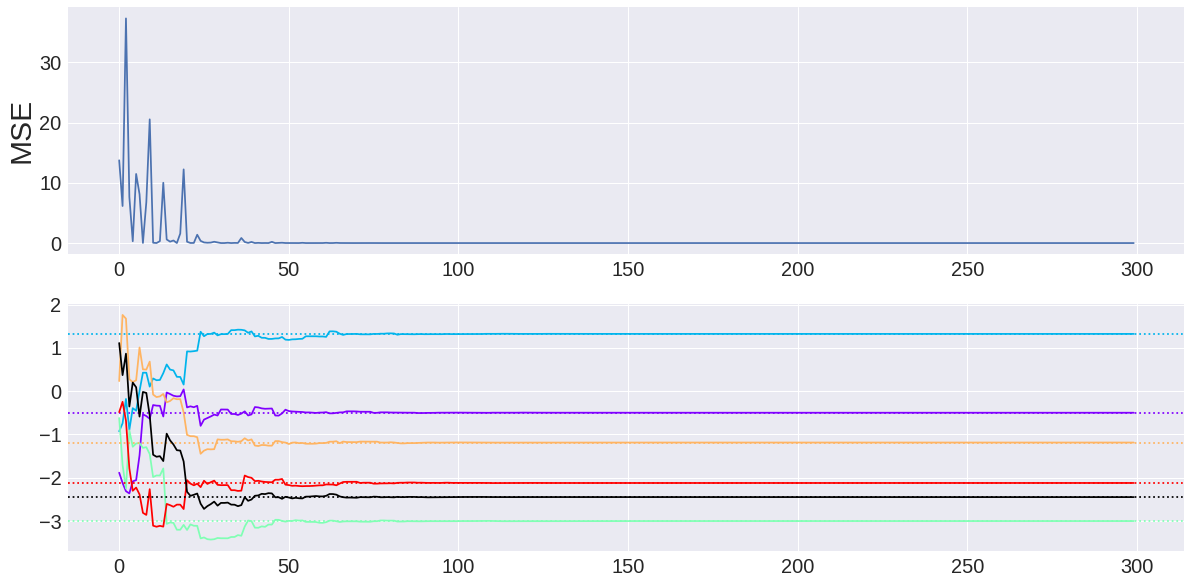

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')
N,n_feature = 300,5
lr = 0.1
t_W = np.random.uniform(-3,3,(n_feature,1))
t_b = np.random.uniform(-3,3,(1,))

W = np.random.uniform(-3,3,(n_feature,1))
b = np.random.uniform(-3,3,(1,1))

x_data = np.random.randn(N,n_feature)
y_data = x_data @ t_W +t_b

J_track =list()
W_track,b_track = list(),list()

for data_idx,(X,y) in enumerate(zip(x_data,y_data)):
    W_track.append(W)
    b_track.append(b)

    X = X.reshape(1,-1)
    pred = X @ W +b
    J = (y-pred)**2
    J_track.append(J.squeeze())
   
    dJ_dpred = -2*(y-pred)
    dpred_dw = X
    dpred_db = 1

    dJ_dw = dJ_dpred * dpred_dw
    dJ_db = dJ_dpred * dpred_db

    W = W - lr*dJ_dw.T
    b = b - lr*dJ_db 

W_track = np.hstack(W_track)
b_track = np.concatenate(b_track).flatten()

fig,axes = plt.subplots(2,1,figsize=(20,10))
axes[0].plot(J_track)
axes[0].set_ylabel('MSE',fontsize=30)
axes[0].tick_params(labelsize=20)

cmap = cm.get_cmap('rainbow',lut=n_feature)
for w_idx,(t_w,w) in enumerate(zip(t_W,W_track)):
    axes[1].axhline(y=t_w,color=cmap(w_idx),linestyle=':')
    axes[1].plot(w,color=cmap(w_idx))

axes[1].axhline(y=t_b,color='black',linestyle=':')
axes[1].plot(b_track,color='black')
axes[1].tick_params(labelsize=20)